In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve

import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline

## Modelos

In [41]:
def linear_model(x,m,b):
    return m*x+b

def exponential_model(x,a,b,c):
    #a, b, c = p
    return a*np.exp(b*x)+c

def simple_exp(x,k):
    return np.exp(k*x)

# MAGIA

In [49]:
class graph:
    def __init_graph(self, style='fivethirtyeight'):
        mpl.style.use(style)
        plt.rcParams['figure.figsize'] = [9,9]
        plt.rc('font', size=14)
        self.fig, self.ax = plt.subplots()
        self.fig.autofmt_xdate()
        self.ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
            
    def __init__(self, data, method=exponential_model, extrapolate=0):
        self.data = data
        self.method = method
        self.periods = data.shape[0] + extrapolate
        self.__init_graph()
    
    def __getitem__(self, place):
        return self.data[place].dropna()
    
    def _get_estimate(self, place_data):
        model = curve_fit(self.method, place_data.index, place_data)[0]
        data_start = min(place_data.index)
        estimate_data = [self.method(i, *model) for i in range(data_start, self.periods)]
        dates = pd.date_range(start='3/6/2019', periods=self.periods)[data_start:]
        estimate = pd.DataFrame(estimate_data, index=dates)
        print(estimate)
        return estimate
    
    def plot_curve(self, place_data, color=None, label=None):
        estimate = self._get_estimate(place_data)
        self.ax.plot(estimate, label=label, color=color)

    def plot_scatter(self, place_data, marker='x', color=None, label=None):
        data_start = min(place_data.index)
        data_end = data_start+place_data.shape[0]
        dates = pd.date_range(start='3/6/2019', periods=self.periods)[data_start:data_end]
        self.ax.plot(dates, place_data, marker, label=label, color=color)
        
    def plot_place(self, place, marker='x', color=None, label=None):
        place_data = self[place]
        label = place if label is None else label
        self.plot_curve(place_data, label=label)
        
        scatter_label = f'Casos {place}'
        self.plot_scatter(place_data, label=scatter_label, marker=marker, color=color)
        
    
    def plot_history(self, place, curves=1, shade=7, method=exponential_model):
        place_data = self[place]
        
        estimates = []
        for n in range(shade,0,-1):
            last_point = place_data.shape[0]-n
            partial_data = place_data[:last_point]
            estimate = self._get_estimate(partial_data)
            estimates += [estimate[0].tolist()]
        
        for n in range(curves, 0, -1):
            last_point = place_data.shape[0]-n
            partial_data = place_data[:last_point]
            self.plot_curve(partial_data, label=f'{place} al {5+last_point} de marzo')
            
        all_estimates = list(zip(*estimates))
        max_values = [max(value) for value in all_estimates]
        min_values = [min(value) for value in all_estimates]
        plt.fill_between(estimate.index, min_values, max_values,
                         color='gray', alpha=0.2, label='Curvas Anteriores')
        
        
    def draw(self, title, xlabel, ylabel):
        days = mdates.DayLocator(interval=2) 
        self.ax.xaxis.set_major_locator(days)
        days_minor = mdates.DayLocator(interval=1)  
        
        plt.legend(loc='upper left')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        self.ax.xaxis.set_tick_params(which='minor')
        plt.title(title)
        self.ax.xaxis
        
        plt.show()

# Costa Rica Extrapolado

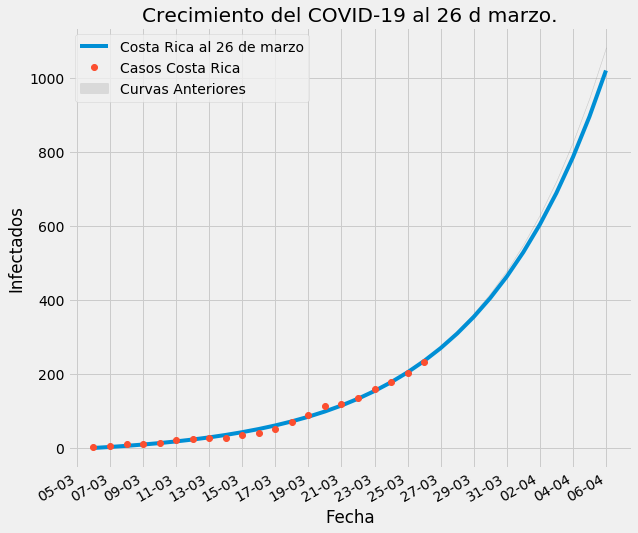

In [42]:
paises = pd.read_csv('co.csv', index_col=0)

grafico = graph(paises, extrapolate=11)


grafico.plot_place('Costa Rica', marker='o', label='Costa Rica al 26 de marzo')


grafico.draw('Crecimiento del COVID-19 al 26 d marzo.', xlabel='Fecha', ylabel='Infectados')

# Costa Rica con pasado

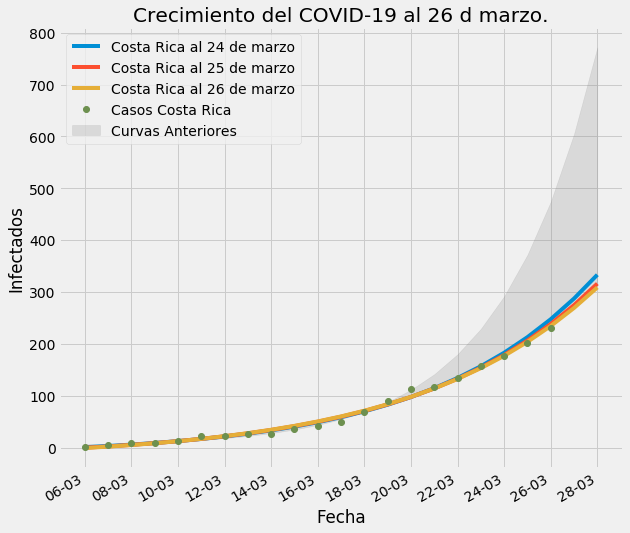

In [45]:
paises = pd.read_csv('co.csv', index_col=0)

grafico = graph(paises, extrapolate=2)

grafico.plot_history('Costa Rica', shade=7, curves=2)
grafico.plot_place('Costa Rica', marker='o', label='Costa Rica al 26 de marzo')


grafico.draw('Crecimiento del COVID-19 al 26 d marzo.', xlabel='Fecha', ylabel='Infectados')

# Comparacion de Paises

                     0
2019-03-06   -0.708249
2019-03-07    1.988857
2019-03-08    5.053799
2019-03-09    8.536744
2019-03-10   12.494700
2019-03-11   16.992450
2019-03-12   22.103612
2019-03-13   27.911845
2019-03-14   34.512215
2019-03-15   42.012758
2019-03-16   50.536239
2019-03-17   60.222170
2019-03-18   71.229088
2019-03-19   83.737151
2019-03-20   97.951088
2019-03-21  114.103550
2019-03-22  132.458918
2019-03-23  153.317627
2019-03-24  177.021089
2019-03-25  203.957275
2019-03-26  234.567073
2019-03-27  269.351496
                     0
2019-03-06   -6.188462
2019-03-07   -4.112603
2019-03-08   -1.558081
2019-03-09    1.585475
2019-03-10    5.453889
2019-03-11   10.214301
2019-03-12   16.072393
2019-03-13   23.281274
2019-03-14   32.152415
2019-03-15   43.069110
2019-03-16   56.503031
2019-03-17   73.034615
2019-03-18   93.378136
2019-03-19  118.412570
2019-03-20  149.219571
2019-03-21  187.130207
2019-03-22  233.782472
2019-03-23  291.192054
2019-03-24  361.839430
2019-03-25 

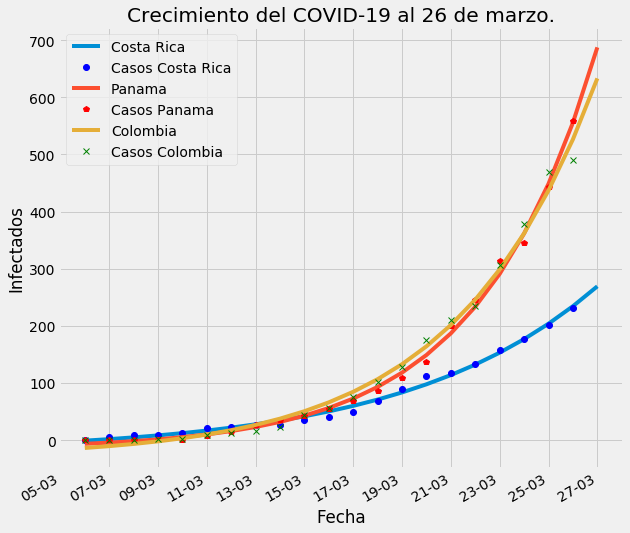

In [51]:
paises = pd.read_csv('co.csv', index_col=0)

grafico = graph(paises, extrapolate=1)

grafico.plot_place('Costa Rica', marker='o', color='blue')
grafico.plot_place('Panama', marker='p', color='red')
grafico.plot_place('Colombia', marker='x', color='green')

grafico.draw('Crecimiento del COVID-19 al 26 de marzo.', xlabel='Fecha', ylabel='Infectados')

# Comparacion de Provincias

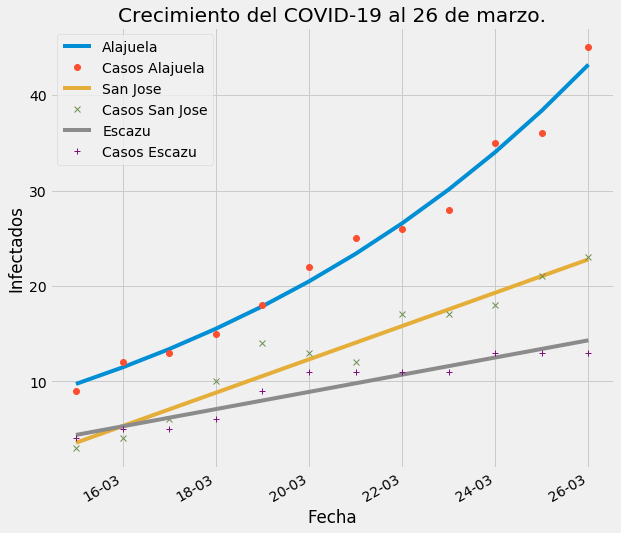

In [40]:
cantones = pd.read_csv('cantones.csv', index_col=0)
grafico = graph(cantones, method=exponential_model)

grafico.plot_place('Alajuela', marker='o')
grafico.method = linear_model
grafico.plot_place('San Jose', marker='x')
grafico.plot_place('Escazu', marker='+')


grafico.draw('Crecimiento del COVID-19 al 26 de marzo.', xlabel='Fecha', ylabel='Infectados')

# Codigo Sucio. Hace cosas.

In [21]:
df = paises[:]

In [22]:
df['anterior'] = df['Costa Rica'].shift(1)
df['crecimiento'] = (df['Costa Rica'] - df['anterior'])/df['anterior']

/home/rruiz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/rruiz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
x_crecimiento = df['crecimiento'].iloc[2:]*100

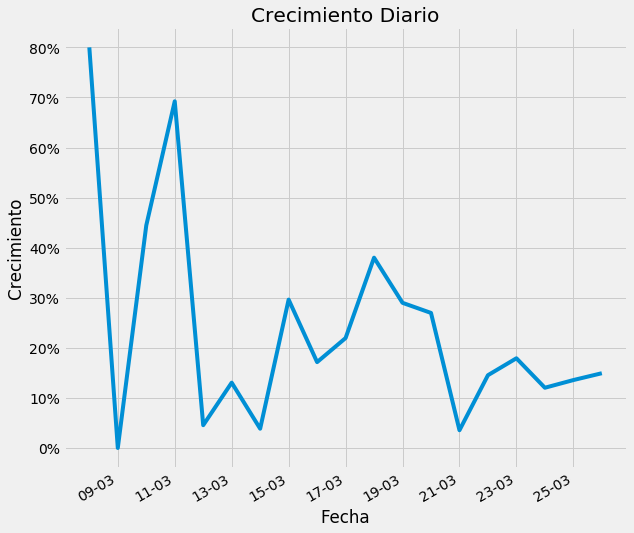

In [24]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))




x_crecimiento = df['crecimiento'].iloc[2:]*100

fechas = pd.date_range(start='3/8/2019', periods=len(x_crecimiento))
crecimiento_df = pd.DataFrame(x_crecimiento.tolist(), index=fechas)
plt.plot(crecimiento_df)
plt.title('Crecimiento Diario')
plt.xlabel("Fecha")
plt.ylabel("Crecimiento")
fig.autofmt_xdate()
plt.show()

In [448]:
df

,Costa Rica,Panama,Colombia,anterior,crecimiento
0,1,0,1.0,NaN,NaN
1,5,0,1.0,1.0,4.000000
2,9,0,1.0,5.0,0.800000
3,9,0,3.0,9.0,0.000000
4,13,1,3.0,9.0,0.444444
5,22,8,9.0,13.0,0.692308
6,23,14,13.0,22.0,0.045455
7,26,27,16.0,23.0,0.130435
8,27,36,24.0,26.0,0.038462
9,35,43,45.0,27.0,0.296296


Text(0, 0.5, 'Casos nuevos')

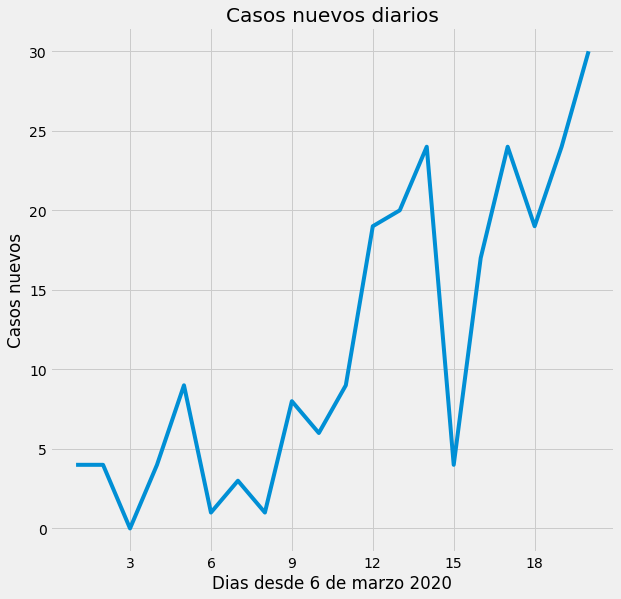

In [28]:
import matplotlib.ticker as mtick
ax = plt.figure().gca()
#...
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.plot((df['Costa Rica'] - df['anterior']))
plt.title('Casos nuevos diarios')
plt.xlabel("Dias desde 6 de marzo 2020")
plt.ylabel("Casos nuevos")